### Данные
user_data:

    client – идентификатор пользователя
    premium – является ли клиент премиальным
    age – возраст

logs:

    client – идентификатор пользователя
    success – результат (успех – 1, нет – 0)
    platform – платформа
    time – время в формате Unix

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [88]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [34]:
user_data.head() # знакомимся с данными

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [23]:
user_data.shape

(2954, 3)

In [14]:
logs.shape

(4500, 4)

In [28]:
user_data.dtypes  # типы данных в колонках датасета

client     int64
premium     bool
age        int64
dtype: object

In [42]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [31]:
user_data.isna().sum()   # пропущенных значений в датасете нет

client     0
premium    0
age        0
dtype: int64

In [30]:
logs.isna().sum()  # пропущенных значений в датасете нет

client      0
success     0
platform    0
time        0
dtype: int64

In [26]:
user_data.describe()   # описательная статистика по датасету

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [29]:
logs.describe()   # описательная статистика по датасету

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [33]:
logs.platform.nunique()   # в датасете есть 3 уникальные платформы

3

In [32]:
logs.platform.value_counts()  # кол-во устройств на разных платформах

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [21]:
logs.platform.value_counts(normalize=True)  # частота использования платформ в %

phone       0.611778
computer    0.334444
tablet      0.053778
Name: platform, dtype: float64

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:
12, 123, 456

Отбераем все успешные операции, проводим группировку по клиентам и считайтаем для каждого кол-во успешных операций. 
Находим максимум и отбераем всех клиентов с таким количеством.
Сортируем их id по возрастанию.

In [47]:
success_number = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'success': 'count'}) \
                    .sort_values('success', ascending=False) 

In [51]:
max_success = success_number.success.max()  # макс. число успехов

In [56]:
# отбираем клиентов с таким числом успешных операций
# ссылаемся на переменную ко-й нет в df через @
# tolist преобразует pd серию в python list
successful_clients = success_number \
                    .query('success == @max_success') \
                    .sort_values('client') \
                    .client \
                    .tolist()

In [59]:
# преобразуем list to str через строчное выражение в цикле и разделяем их "; "
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Второй вариант решения без лишнего запроса. Отбираем макс. кол-во успешных действий, сортируем по убыванию и группируем по пользователю:

In [65]:
success_number_2 = logs \
                    .groupby('client', as_index=False) \
                    .agg({'success': 'sum'}) \
                    .sort_values('success', ascending=False) 

In [66]:
success_number_2.head()

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41


In [67]:
success_number.head()

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


С какой платформы было совершено наибольшее количество успешных операций?

In [73]:
logs.query('success == True') \
    .groupby('platform') \
    .agg({'platform': 'count'})

,platform
platform,
computer,1090
phone,2019
tablet,180


In [100]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

Какую платформу предпочитают премиальные клиенты?

В logs операции, а в user_data премиальность клиента, значит надо их объединить, отобрать премиум клиентов, найти какую платформу они используют чаще.

In [108]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [45]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [76]:
# в обоих df client одинакова, его можно не писать, т.к. она одна
# по умолчанию выбирается inner join, т.е. строки ко-м есть соот-е в обоих таблицах
# это и нужно поэтому не расписываем: df.merge(other_df, on='same_column', how='inner')
data = user_data.merge(logs)

In [79]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [81]:
# отбираем только примиум кл. и считаем частоту встречаемости каждой платформы и находим макс.
data.query('premium == True').platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

Для удобства все импортируем seaborn и matplotlib в первой ячейке. 
Графики будем выводить прямо в ячейке %matplotlib inline

/home/ag/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ag/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

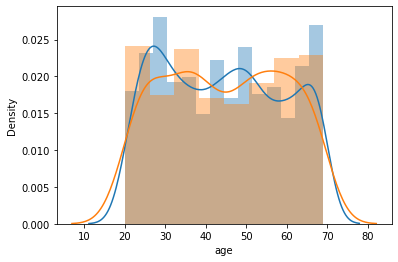

In [95]:
# Чтобы два графика отображались на одном рисунке, помещаем их в одну ячейку
# Отбираем премиум (желтых) и остальных (синих) кл.
sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

/home/ag/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ag/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

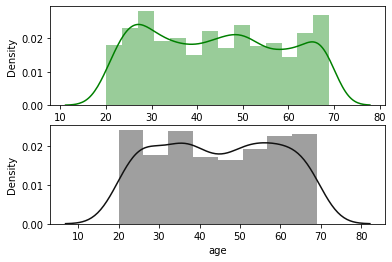

In [99]:
# Поместим пару графиков вместе, разметим сетку их расположения, через
# метод plt.subplots, где указываем 2 строки и 1 колонку, 
# помещаем их в переменную fig и ax соответственно.
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(data.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(data.query('premium == True').age, ax=ax[1], color='#111111')

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [100]:
# Кол-во успешных операций сгруппированные по клиентам 
success_data = data.groupby('client') \
    .agg({'success': 'sum'})

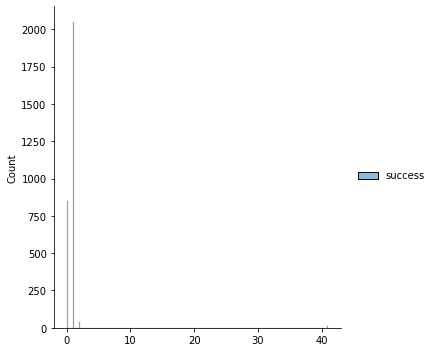

In [104]:
# Рисуем график по кол-ву успешных опвераций
sns.displot(success_data, kde=False)

In [106]:
# На графике плохо видно 9 клиентов, ко-е совершили 41 успешную операцию!
success_data.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [118]:
# Отбираем компьютерные операции и группируем по возрасту пользователей
# кол-во суммируем оп
age_comp_data = data.query('platform == "computer"') \
    .groupby('age', as_index=False) \
    .agg({'success': 'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

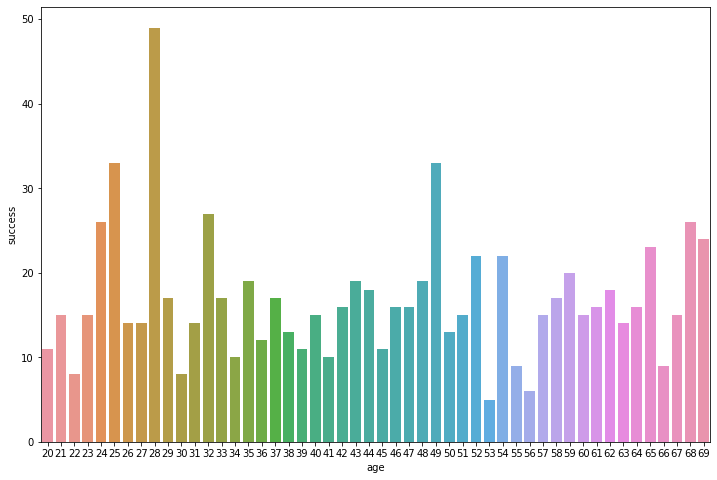

In [126]:
# Рисуем график barplot, указываем размер и возраст по х, а кол-во по у
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='success', data=age_comp_data)

In [124]:
# Второй вариант решения: сразу отбирем только успешные операции с компьютера
comp_data = data.query("success == True and platform == 'computer'")

<AxesSubplot:xlabel='age', ylabel='count'>

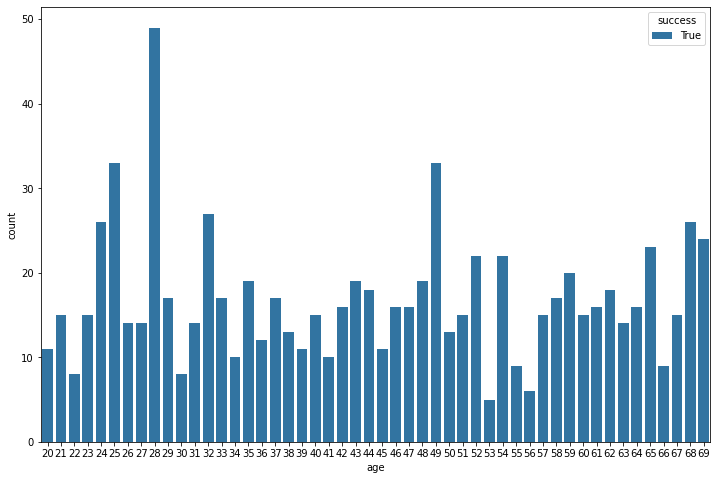

In [125]:
# График countplot считает частоту встречаемости каждого значения в колонке
plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='success', data=comp_data)